In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_excel('datasets/Canada.xlsx',
                 sheet_name = 'Canada by Citizenship',
                 skiprows=range(20),
                 skipfooter=2,
                engine= 'openpyxl')
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index([       'Type',    'Coverage',      'OdName',        'AREA',
          'AreaName',         'REG',     'RegName',         'DEV',
           'DevName',          1980,          1981,          1982,
                1983,          1984,          1985,          1986,
                1987,          1988,          1989,          1990,
                1991,          1992,          1993,          1994,
                1995,          1996,          1997,          1998,
                1999,          2000,          2001,          2002,
                2003,          2004,          2005,          2006,
                2007,          2008,          2009,          2010,
                2011,          2012,          2013, 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

In [5]:
df.drop([ 'AREA','REG','DEV', 'Type', 'Coverage', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'],
       axis=1,
       inplace=True)

In [6]:
df['Total']=df.iloc[:,4:].sum(axis=1)
df.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0


In [7]:
df.rename(columns={'OdName' : 'Country',
                   'AreaName' : 'Continent',
                   'RegName' : 'Region'},
          inplace=True)
df.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013,     'Total'],
      dtype='object')

In [8]:
df.columns=list(map(str,df.columns))
fav_years=list(map(str,
                   range(1980,2014)))
df.set_index('Country',
             inplace=True)
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0


In [9]:
print(plt.style.available)
plt.style.use('fast')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [10]:
haiti=df.loc['Haiti',fav_years]

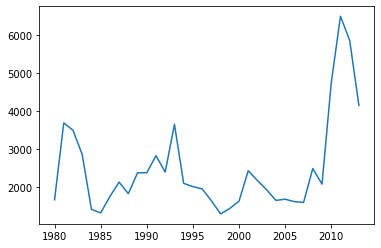

In [11]:
haiti.plot()

Text(0.5, 0, 'Years')

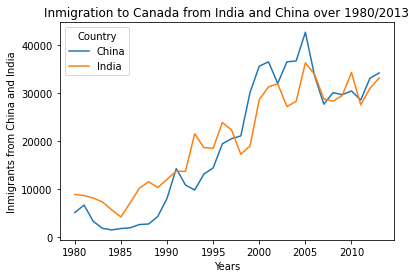

In [12]:
dfCI=df.loc[['China', 'India'],
            fav_years]
dfCI=dfCI.transpose()
dfCI.plot()
plt.title('Inmigration to Canada from India and China over 1980/2013')
plt.ylabel('Inmigrants from China and India')
plt.xlabel('Years')

In [13]:
df_top=df.sort_values(by='Total',
                      ascending=False,
                      axis=0)
df_top.head(7)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Total,World,World,World,143137.0,128641.0,121175.0,89185.0,88272.0,84346.0,99351.0,...,262242.0,251640.0,236753.0,247244.0,252170.0,280687.0,248748.0,257903.0,259021.0,6924212.0
India,Asia,Southern Asia,Developing regions,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,...,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0,691904.0
China,Asia,Eastern Asia,Developing regions,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,...,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0,659962.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045.0,24796.0,20620.0,10015.0,10170.0,9564.0,9470.0,...,7258.0,7140.0,8216.0,8979.0,8876.0,8724.0,6204.0,6195.0,5827.0,551500.0
Unknown,World,World,World,44000.0,18078.0,16904.0,13635.0,14855.0,14368.0,13303.0,...,4785.0,4583.0,4348.0,4197.0,3402.0,3731.0,2554.0,1681.0,1484.0,515059.0
Philippines,Asia,South-Eastern Asia,Developing regions,6051.0,5921.0,5249.0,4562.0,3801.0,3150.0,4166.0,...,18139.0,18400.0,19837.0,24887.0,28573.0,38617.0,36765.0,34315.0,29544.0,511391.0
Pakistan,Asia,Southern Asia,Developing regions,978.0,972.0,1201.0,900.0,668.0,514.0,691.0,...,14314.0,13127.0,10124.0,8994.0,7217.0,6811.0,7468.0,11227.0,12603.0,241600.0


In [14]:
df_top.drop(['Total','Unknown'],
       axis=0,
       inplace=True)

In [15]:
df_top.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,...,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0,691904.0
China,Asia,Eastern Asia,Developing regions,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,...,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0,659962.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045.0,24796.0,20620.0,10015.0,10170.0,9564.0,9470.0,...,7258.0,7140.0,8216.0,8979.0,8876.0,8724.0,6204.0,6195.0,5827.0,551500.0
Philippines,Asia,South-Eastern Asia,Developing regions,6051.0,5921.0,5249.0,4562.0,3801.0,3150.0,4166.0,...,18139.0,18400.0,19837.0,24887.0,28573.0,38617.0,36765.0,34315.0,29544.0,511391.0
Pakistan,Asia,Southern Asia,Developing regions,978.0,972.0,1201.0,900.0,668.0,514.0,691.0,...,14314.0,13127.0,10124.0,8994.0,7217.0,6811.0,7468.0,11227.0,12603.0,241600.0


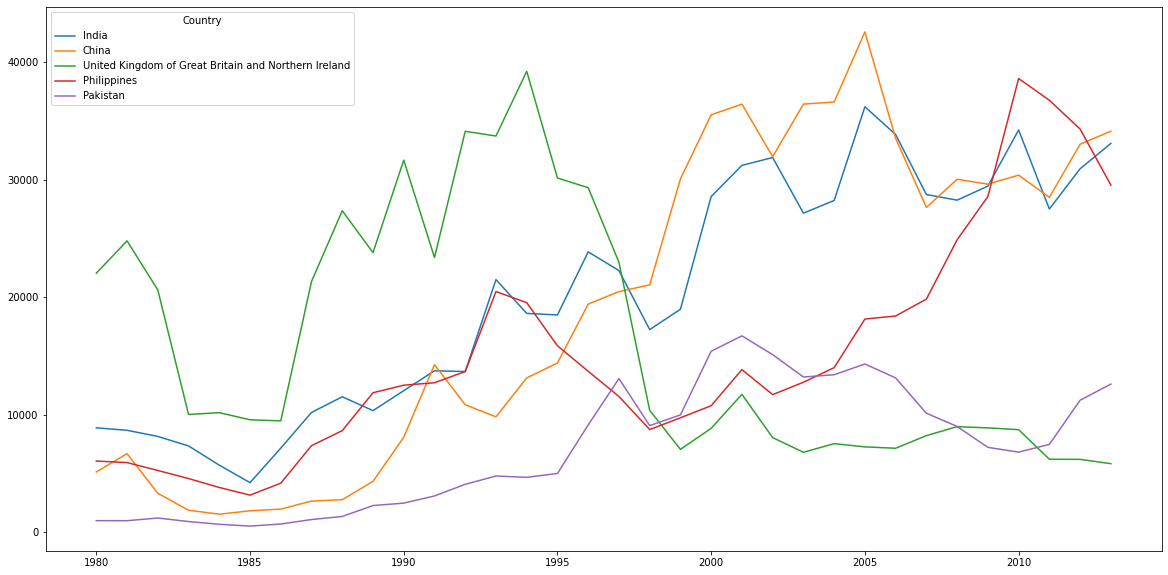

In [16]:
df_top5=df_top[fav_years]
df_top5.head(5)
df_top5y=df_top5.head(5).transpose()
df_top5y.plot(kind='line',
              figsize=(20,10))


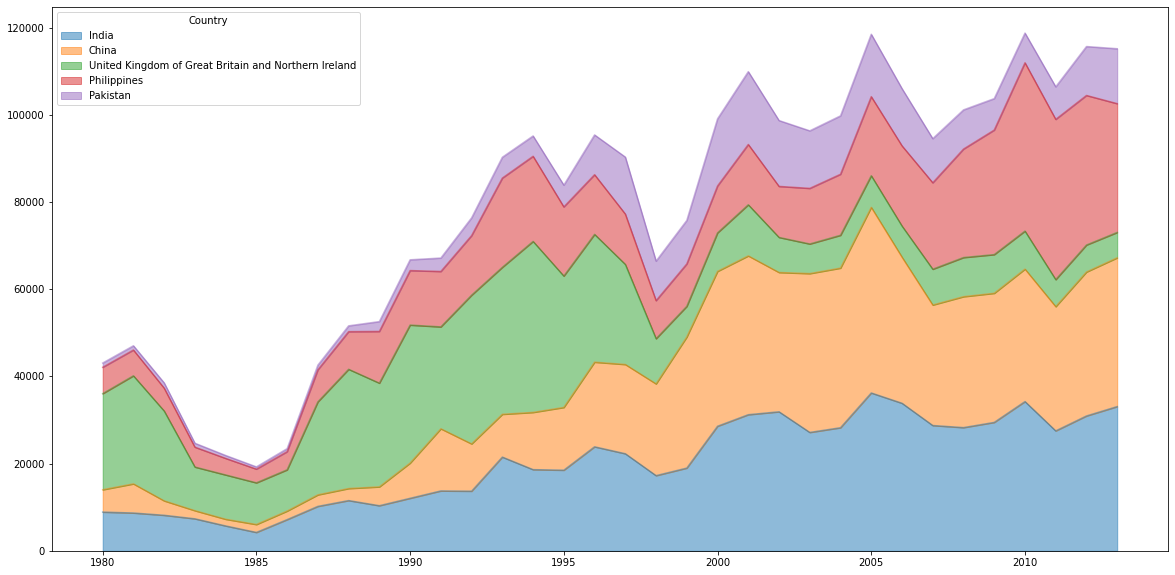

In [17]:
area_chart=df_top5y.plot(kind='area',
                        alpha=0.5,
                        figsize=(20,10))

In [18]:
df_top5.transpose()
df_top5.columns()

TypeError: 'Index' object is not callable

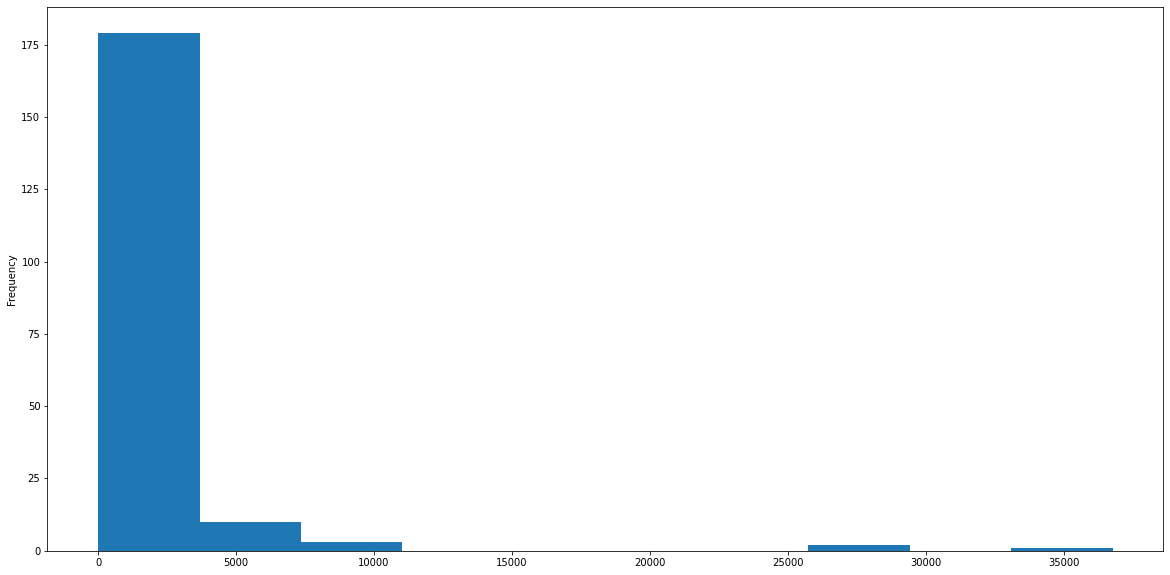

In [33]:
df_tophist=df_top5['2011']
df_tophist.transpose()
df_tophist.plot(kind='hist',
                figsize=(20,10))

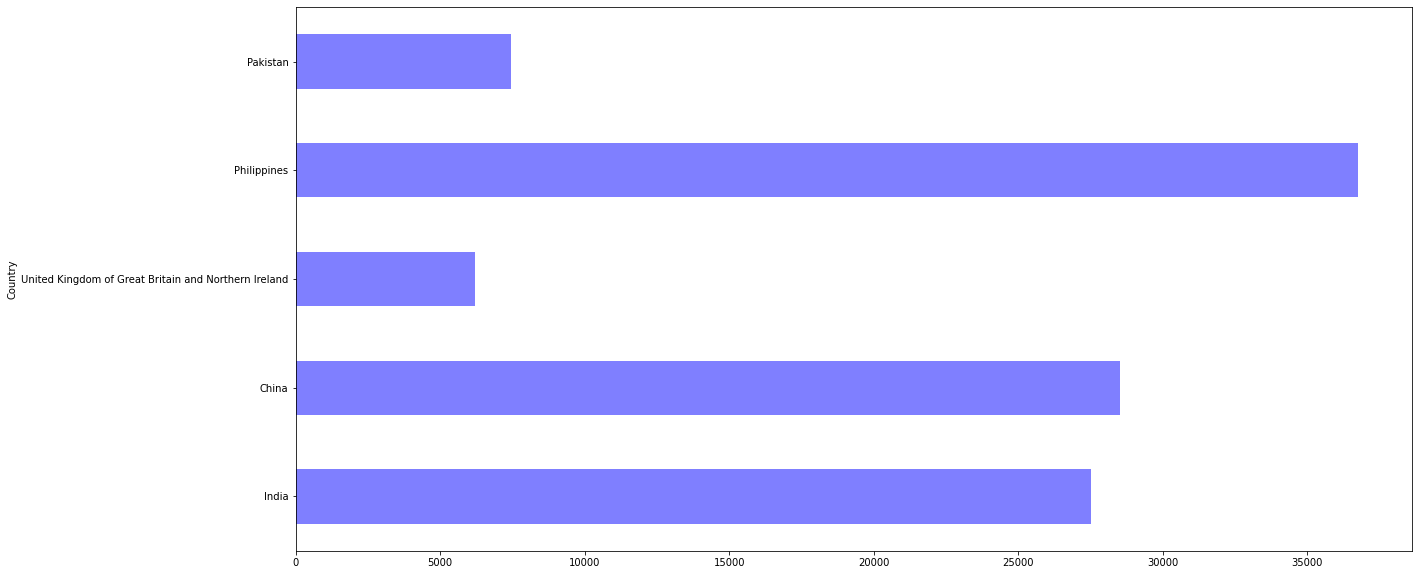

In [42]:
df_topbar=df_top5['2011']
df_topbary=df_topbar.head(5).transpose()
df_topbary.plot(kind='barh',
             figsize=(20,10),
             color='b',
             alpha=0.5)

In [23]:
df_top5

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,10189.0,11522.0,10343.0,...,28235.0,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0
China,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,2643.0,2758.0,4323.0,...,36619.0,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0
United Kingdom of Great Britain and Northern Ireland,22045.0,24796.0,20620.0,10015.0,10170.0,9564.0,9470.0,21337.0,27359.0,23795.0,...,7533.0,7258.0,7140.0,8216.0,8979.0,8876.0,8724.0,6204.0,6195.0,5827.0
Philippines,6051.0,5921.0,5249.0,4562.0,3801.0,3150.0,4166.0,7360.0,8639.0,11865.0,...,14004.0,18139.0,18400.0,19837.0,24887.0,28573.0,38617.0,36765.0,34315.0,29544.0
Pakistan,978.0,972.0,1201.0,900.0,668.0,514.0,691.0,1072.0,1334.0,2261.0,...,13399.0,14314.0,13127.0,10124.0,8994.0,7217.0,6811.0,7468.0,11227.0,12603.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
